In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 24 16:35:51 2020

@author: u300737
"""
import os
import sys

import numpy as np
import pandas as pd
import xarray as xr

start_path=os.getcwd()
ac3budget_scripts_path=start_path+"/../scripts/"
my_git_path=start_path+"/../../"
major_work_path=my_git_path+"/../Work/GIT_Repository/"
synth_ar_path=my_git_path+"/Synthetic_Airborne_Arctic_ARs/"
config_path=synth_ar_path+"config/"
sys.path.insert(1,config_path)
sys.path.insert(2,ac3budget_scripts_path)
sys.path.insert(3,synth_ar_path+"src/")
sys.path.insert(4,synth_ar_path+"plotting/")


###############################################################################
#import flightcampaign
#-----------------------------------------------------------------------------#
import warnings
warnings.filterwarnings("ignore")

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [8]:
from simplified_flight_leg_handling import simplified_run_grid_main
#-----------------------------------------------------------------------------#        
"""
###############################################################################
    Main Script for running interpolation of griddata on flight path
###############################################################################
"""    
ar_of_day="AR_entire_1"
flight=["RF06"]
with HiddenPrints():
    halo_era5,halo_df,cmpgn_cls,ERA5_on_HALO,radar,Dropsondes=\
        simplified_run_grid_main(flight=flight,config_file_path=major_work_path,ar_of_day=ar_of_day)
#halo_era5
flight=cmpgn_cls.flight

In [9]:
Dropsondes.keys()

if not "Lat" in [*Dropsondes.keys()]:
    sondes_lon=[[*Dropsondes["reference_lon"].values()][sonde].data[0] \
                    for sonde in range(Dropsondes["IWV"].shape[0])]
                    
    sondes_lat=[[*Dropsondes["reference_lat"].values()][sonde].data[0]\
                    for sonde in range(Dropsondes["IWV"].shape[0])]
    Dropsondes["Lat"]=pd.Series(data=np.array(sondes_lat),
                                                index=Dropsondes["IWV"].index)
    Dropsondes["Lon"]=pd.Series(data=np.array(sondes_lon),
                                                index=Dropsondes["IWV"].index)

In [10]:
import interpdata_plotting
from flightmapping import FlightMaps
        
#-------------- Plot Path Specifications ---------------------------------#
major_plot_path=cmpgn_cls.campaign_path+"/plots/"
if not os.path.exists(major_plot_path):
    os.mkdir(major_plot_path)
plot_path=major_plot_path+flight[0]+"/"
if not os.path.exists(plot_path):
    os.mkdir(plot_path)

#Check if plot path exists, if not create it.
if ar_of_day!=None:
        plot_path=plot_path+ar_of_day+"/"
        if not os.path.exists(plot_path):
            os.mkdir(plot_path)
    #-------------------------------------------------------------------------#
ERA_HALO_Plotting   = interpdata_plotting.ERA_HALO_Plotting(
                                        flight,ar_of_day=ar_of_day,
                                        plot_path=plot_path,
                                        synthetic_campaign=False)    
#CARRA_HALO_Plotting = interpdata_plotting.CARRA_HALO_Plotting(
#                                        plot_path=plot_path,
#                                        flight=flight,ar_of_day=ar_of_day,
#                                        synthetic_campaign=synthetic_flight)
# Mainly for ICON Plotting, but IVT cross-section plotter using ERA-5
# and/or ICON is included in ICON_HALO_Plotting
#if icon_is_desired:
#    icon_plot_path=plot_path+"ICON_2km/"
#    if not os.path.exists(icon_plot_path):
#        os.mkdir(icon_plot_path)
#    else:
#        icon_plot_path=plot_path # If ICON is not included, 
                                 # plot_path remains due to IVT-plot                        
#    ICON_HALO_Plotting  = interpdata_plotting.ICON_HALO_Plotting(cmpgn_cls,
#                                plot_path=icon_plot_path,
#                                flight=flight,ar_of_day=ar_of_day,
#                                synthetic_campaign=False)
    
#-------------------------------------------------------------------------#
#Load Flight map class
Flightmap=FlightMaps(cmpgn_cls.major_path,cmpgn_cls.campaign_path,
                         cmpgn_cls.aircraft,cmpgn_cls.instruments,
                         cmpgn_cls.interested_flights,plot_path=plot_path,
                         flight=flight[0],ar_of_day=ar_of_day,
                         synthetic_campaign=False,
                         synthetic_icon_lat=0,
                         synthetic_icon_lon=0,
                         track_type="internal",pick_legs="all",
                         track_dict=None)

set_font=ERA_HALO_Plotting.specify_plotting()
style_name="typhon"


IVT conv. mapped
Evaporation mapped
Total precipitation mapped
IWV Tendency mapped
Hour of the day: 12
Meridional-Zonal ratio:  -5.814734803146581
PLot path  C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository//HALO_AC3/plots/RF06/AR_entire_1/
Figure saved as: C:\Users\u300737\Desktop\PhD_UHH_WIMI\Work\GIT_Repository//HALO_AC3/plots/RF06/AR_entire_1/AR_entire_1_HALO_AC3_RF06_Moisture_Components_Map_ERA5.png


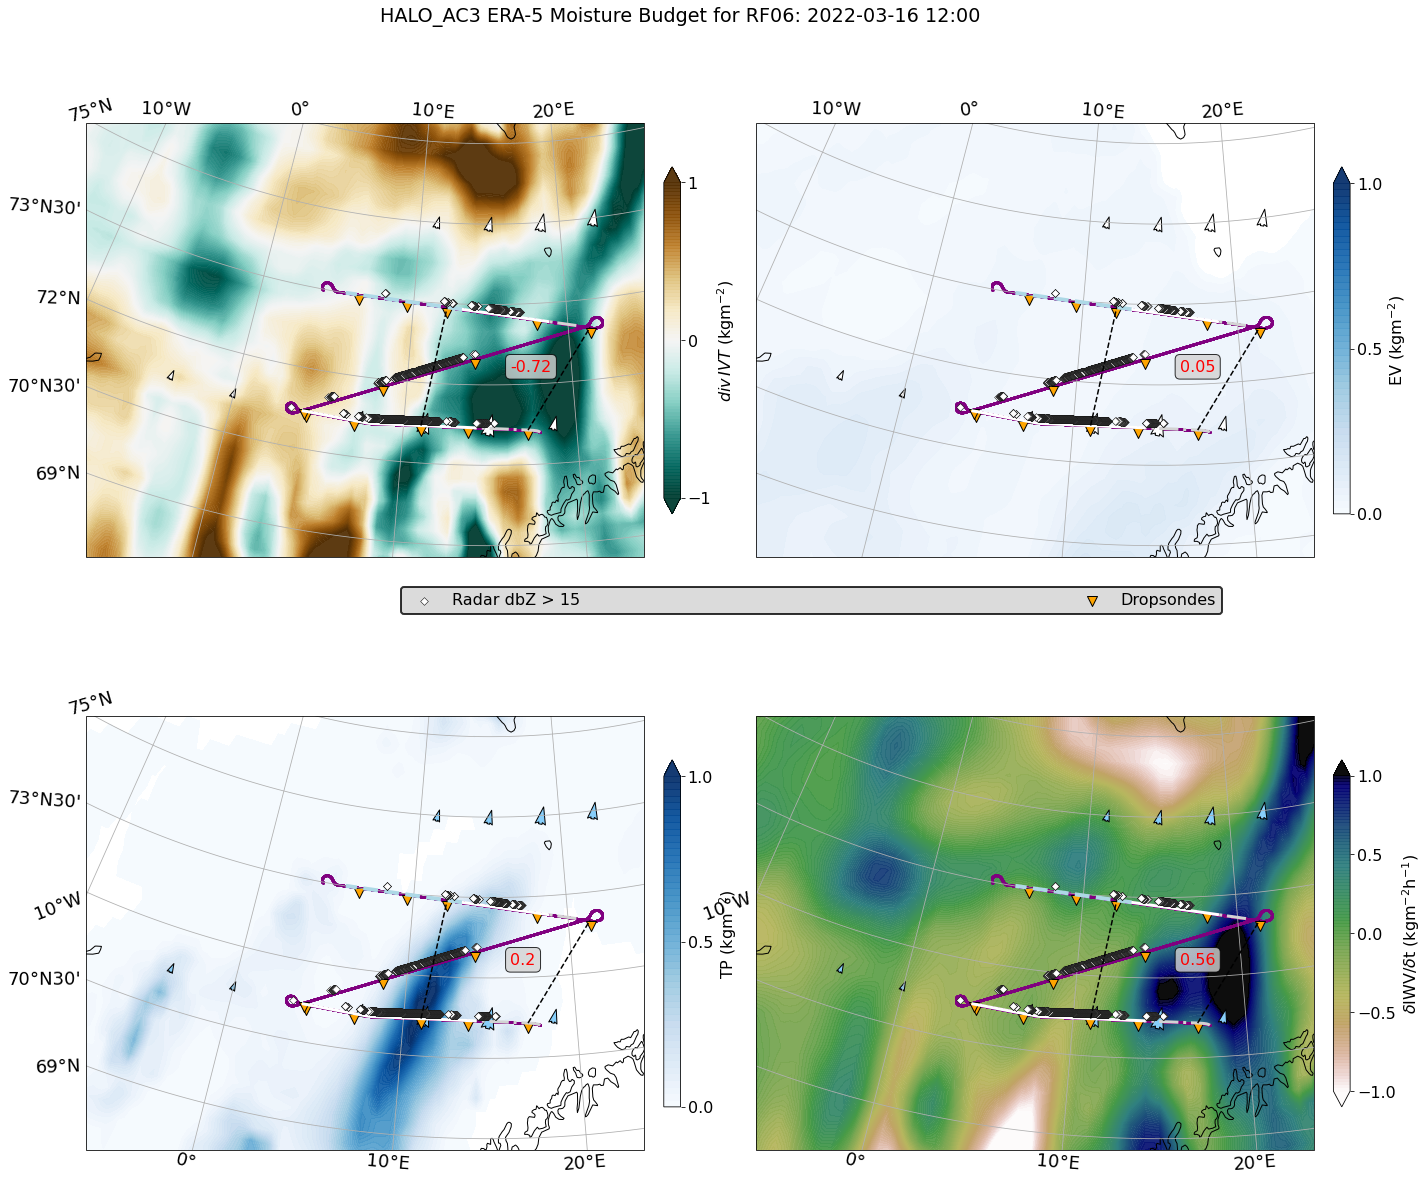

In [11]:
# Map the AR flight intersection
last_hour=pd.DatetimeIndex(halo_df.index).hour[-1]#
Flightmap.halo_dict={flight[0]:halo_df}

Flightmap.plot_AR_moisture_components_map(ERA5_on_HALO,radar,Dropsondes,cmpgn_cls,
                                          do_sector_based=True,only_warm_sector=True)
halo_era5.name="ERA5"

In [12]:
hmc_plotting_desired=False
if hmc_plotting_desired:
    #if synthetic_icon:
            #if synthetic_icon_lat!=0:
    #     hydrometeor_lvls_path=hydrometeor_lvls_path+"Latitude_"+\
           # str(synthetic_icon_lat)+"/"
    #----------------------------------------------------------------------#
    # ERA5 
    if era_is_desired:
           halo_era5_hmc=ERA5_on_HALO.load_hwc()
       #----------------------------------------------------------------------#
       # CARRA
    if not carra_is_desired:
           pass
    else:
        CARRA_on_HALO.load_or_calc_interpolated_hmc_data()
        halo_carra_hmc=CARRA_on_HALO.carra_halo_hmc
    #
    # ICON                                                               
    if not icon_is_desired:
            pass
    else:
        #Get vertical profiles of moisture/ hydrometeors
        halo_icon_hmc=ICON_on_HALO.load_hwc(with_hydrometeors=False)
    #----------------------------------------------------------------------#    
    # Retrieval
    if flight==["RF10"]:
        if include_retrieval:
            retrieval_dict=cmpgn_cls.load_radiometer_retrieval(
                                       campaign,
                                       variables=["T","rho_v"],
                                       calculate_spec_hum=True,
                                       sonde_p=Upsampled_Dropsondes["Pres"])
            retrieval_dict=cmpgn_cls.vertical_integral_retrieval(
                                        retrieval_dict,Upsampled_Dropsondes)
                
    #%%
    """
        Plotting of datasets from HALO_ERA_Plotting class   
    """
    levels=np.linspace(0,50,50)
    

"""
old stuff not needed
###########################################################################
        ## HMC visualization
        if hmc_plotting_desired:
            # Sometimes typhon works, sometimes not, this is why 
            # try except commands are used.
            with plt.style.context(styles(style_name)):
                print("Plots created with Typhon")
                #try:
                #    ERA_HALO_Plotting.plot_radar_era5_combined_hwc(radar,
                #                                halo_era5_hmc,date,
                #                                'temperature',
                #                                save_figure=True)
        
                #except:
                    #    pass
                #try:
                    #    ICON_HALO_Plotting.plot_radar_icon_hwc(
                    #                    radar,halo_icon_hmc,
                    #                    "temperature",save_figure=True)
                #except:
                    #pass
                #
                if not synthetic_flight:
                    try:
                        cmpgn_cls.plot_hamp_brightness_temperatures(mwr["T_b"],
                                flight,date,halo_era5_hmc["IWC"].index[0],
                                halo_era5_hmc["IWC"].index[-1],
                                ar_of_day=ar_of_day,
                                plot_path=plot_path)
                    except:
                        pass
                
                    try:
                        cmpgn_cls.plot_radar_AR_quicklook(radar,ar_of_day,
                                                   flight[0],plot_path)
                    except:
                        pass
                
                try:
                    
                    cmpgn_cls.plot_AR_sonde_thermodynamics(Upsampled_Dropsondes,
                                    radar,date,flight[0],
                                    os.getcwd()+"/"+flight[0]+"/",
                                    Upsampled_Dropsondes["AirT"].index[0],
                                    Upsampled_Dropsondes["AirT"].index[-1],
                                    plot_path=plot_path,save_figure=True,
                                    low_level=True,ar_of_day=ar_of_day)
                except:
                    print("No dropsonde plot created")
                if track_type=="internal":
                    try:
                        ERA_HALO_Plotting.internal_leg_representativeness(cmpgn_cls,
                                                                      ERA5_on_HALO,
                                                                      flight[0],
                                                                      halo_df,
                                                                      halo_era5_hmc)
                    except:
                        pass
                    if icon_is_desired:
                        try:
                            ICON_HALO_Plotting.mean_internal_leg_representativeness(
                                        cmpgn_cls,ICON,ICON_on_HALO,
                                        flight[0],halo_df,halo_icon_hmc)
                        except:
                            pass
                        try:    
                            Flightmap.plot_ar_section_internal_leg_ICON(cmpgn_cls)
                        except:
                            pass
                        #try:
                        #    ICON_HALO_Plotting.internal_leg_representativeness(
                        #                                cmpgn_cls,ICON,ICON_on_HALO,
                        #                                flight[0],halo_df,
                        #                                halo_icon_hmc)
                        #except:
                        #    pass
                        #        sys.exit()
                    
                    # can also be done when having synthetic observations
                    #Low level plot
                try:
                    ERA_HALO_Plotting.two_H_plot_radar_era5_combined_hwc(
                                ERA5_on_HALO,
                                radar,halo_era5_hmc,date,
                                'temperature',
                                halo_era5_hmc["IWC"].index[0],
                                halo_era5_hmc["IWC"].index[-1],
                                save_figure=True,
                                do_masking=do_orographic_masking,
                                low_level=True)
                except:
                    pass
                try:
                    ERA_HALO_Plotting.two_H_plot_radar_era5_combined_hwc(
                                        ERA5_on_HALO,
                                        radar,halo_era5_hmc,
                                        date,'temperature',
                                        halo_era5_hmc["IWC"].index[0],
                                        halo_era5_hmc["IWC"].index[-1],
                                        save_figure=True,low_level=False)
                except:
                    pass
            
                # All levels
                try: 
                    ERA_HALO_Plotting.plot_HALO_AR_ERA_thermodynamics(
                                    ERA5_on_HALO,radar,halo_era5_hmc,date,
                                    halo_era5_hmc["IWC"].index[0],
                                    halo_era5_hmc["IWC"].index[-1],
                                    do_masking=do_orographic_masking,
                                    save_figure=True,low_level=False)
                except:
                    pass
                # Low level
                try:
                    ERA_HALO_Plotting.plot_HALO_AR_ERA_thermodynamics(
                                    ERA5_on_HALO,
                                    radar,halo_era5_hmc,date,
                                    halo_era5_hmc["IWC"].index[0],
                                    halo_era5_hmc["IWC"].index[-1],
                                    do_masking=do_orographic_masking,
                                    low_level=True)
                    if carra_is_desired:
                        CARRA_HALO_Plotting.plot_specific_humidity_profile(
                            halo_carra_hmc,halo_df,Dropsondes,radar,date,
                            halo_carra_hmc["u"].index[0],
                            halo_carra_hmc["u"].index[-1],
                            do_masking=do_orographic_masking,
                            low_level=True,AR_sector="all")
                except:
                    pass
            
                if icon_is_desired:                    
                    if ar_of_day:
                        print("Load calc ERA z total column interpolated data")
                        halo_era5=pd.read_csv(hydrometeor_lvls_path+\
                                          interpolated_hmp_file)
                        halo_era5.index=pd.DatetimeIndex(halo_era5.iloc[:,0])
                    
                        ICON_HALO_Plotting.plot_HALO_AR_ICON_thermodynamics(
                                            halo_icon_hmc,halo_era5,
                                            Dropsondes,radar,date,
                                            os.getcwd()+"/"+flight[0]+"/",
                                            halo_icon_hmc["u"].index[0],
                                            halo_icon_hmc["u"].index[-1],
                                            hydrometeor_icon_path,
                                            with_ivt=True,do_masking=False,
                                            save_figure=True, low_level=True)
                        try:
                            ICON_HALO_Plotting.plot_AR_q_lat(halo_icon_hmc,halo_df,
                                            Dropsondes,radar,date,
                                            os.getcwd()+"/"+flight[0]+"/",
                                            halo_icon_hmc["u"].index[0],
                                            halo_icon_hmc["u"].index[-1],
                                            hydrometeor_icon_path,
                                            with_ivt=True,do_masking=False,
                                            save_figure=True, low_level=True)
                        except:
                            pass
                        if flight[0]=="RF10":
                            if include_retrieval:
                                cmpgn_cls.retrieval_humidity_plotting(
                                    halo_icon_hmc,retrieval_dict,Dropsondes,
                                    Upsampled_Dropsondes,date,
                                    flight[0],os.getcwd()+"/"+\
                                        flight[0]+"/",
                                        halo_icon_hmc["u"].index[0],
                                        halo_icon_hmc["u"].index[-1],
                                    hydrometeor_icon_path,
                                    plot_path=plot_path,
                                    with_ivt=True,
                                    do_masking=False,
                                    save_figure=True,
                                    low_level=True, 
                                    ar_of_day=ar_of_day)
"""

'\nold stuff not needed\n###########################################################################\n        ## HMC visualization\n        if hmc_plotting_desired:\n            # Sometimes typhon works, sometimes not, this is why \n            # try except commands are used.\n            with plt.style.context(styles(style_name)):\n                print("Plots created with Typhon")\n                #try:\n                #    ERA_HALO_Plotting.plot_radar_era5_combined_hwc(radar,\n                #                                halo_era5_hmc,date,\n                #                                \'temperature\',\n                #                                save_figure=True)\n        \n                #except:\n                    #    pass\n                #try:\n                    #    ICON_HALO_Plotting.plot_radar_icon_hwc(\n                    #                    radar,halo_icon_hmc,\n                    #                    "temperature",save_figure=True)\n                